In [1]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import arviz as az
import xarray as xr
from corner import corner

In [2]:
directory = "/mnt/data-storage/alexlyttle/scalable-stellar-inference"
summary = xr.load_dataset(os.path.join(directory, "summary.nc"))
summary

<xarray.Dataset>
Dimensions:           (star: 9998, metric: 12)
Coordinates:
  * star              (star) int32 0 1 2 3 4 5 ... 9994 9995 9996 9997 9998 9999
  * metric            (metric) object 'mean' 'sd' 'hdi_3%' ... 'median' 'upper'
Data variables: (12/19)
    M_H               (star, metric) float64 -0.4579 0.09603 ... 0.128 0.213
    Y                 (star, metric) float64 0.2553 0.007903 ... 0.2697 0.2858
    a_MLT             (star, metric) float64 2.009 0.2082 1.627 ... 1.913 2.071
    evol              (star, metric) float64 0.09671 0.01758 ... 0.433 0.4418
    log_evol          (star, metric) float64 -1.022 0.07824 ... -0.3635 -0.3548
    log_mass          (star, metric) float64 0.088 0.01326 ... 0.2174 0.2418
    ...                ...
    log_Teff          (star, metric) float64 3.857 0.003714 3.85 ... 3.696 3.702
    log_R             (star, metric) float64 0.1384 0.006058 ... 0.6302 0.6404
    log_Dnu           (star, metric) float64 1.936 0.005871 ... 1.294 1.299
    log_L             (star, metric) float64 0.6587 0.01088 ... 1.001 1.011
    log_g             (star, metric) float64 4.249 0.01046 4.23 ... 3.394 3.404
    log_numax         (star, metric) float64 3.253 0.009987 ... 2.479 2.489

In [3]:

# with open(os.path.join(directory, "7967198-divergences.json"), "r") as file:
#     s = file.read()
#     divergances = json.loads(s)
# stars = np.array(list(divergances.keys()), dtype=int)
# num_diverging = np.array(list(divergances.values()), dtype=int)
stars = summary.star.values

In [4]:
with open(os.path.join(directory, "truths.json"), "r") as file:
    s = file.read()
    truths = {k: np.array(v)[stars] if np.ndim(v) > 0 else v for k, v in json.loads(s).items()}

In [5]:
filename = "truths-nearest-neighbour-clean.csv"
truths = pd.read_csv(os.path.join(directory, filename), index_col=0)
truths = truths.loc[stars].to_dict(orient="list")
truths = {k: np.array(v) for k, v in truths.items()}

NameError: name 'num_diverging' is not defined

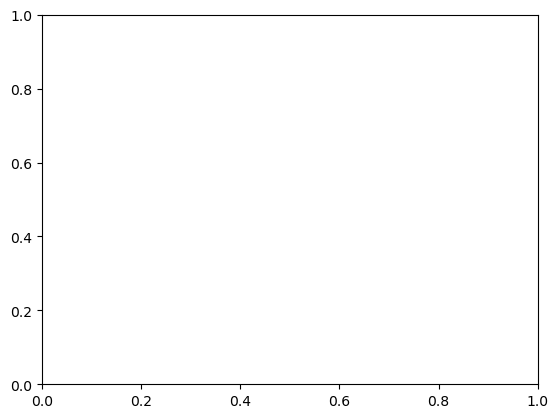

In [6]:
fig, ax = plt.subplots()

c = num_diverging
sorted_stars = np.argsort(c)
s = ax.scatter(truths["log_Teff"][sorted_stars], truths["log_L"][sorted_stars], c=c[sorted_stars], alpha=0.66, vmax=1000, cmap="plasma")

ax.invert_xaxis()
ax.set_title("Lower is better")

fig.colorbar(s, label="divergences", extend="max");

In [7]:
var_name = "log_evol"
metric = "r_hat"
cmap = "cividis"

fig, ax = plt.subplots()

c = summary[var_name].sel(metric=metric).values
sorted_stars = np.argsort(c)
s = ax.scatter(truths["log_Teff"][sorted_stars], truths["log_L"][sorted_stars], c=c[sorted_stars], alpha=0.33, vmax=1.2, cmap=cmap)

ax.invert_xaxis()
ax.set_title("Lower is better")

fig.colorbar(s, label=metric, extend="max");

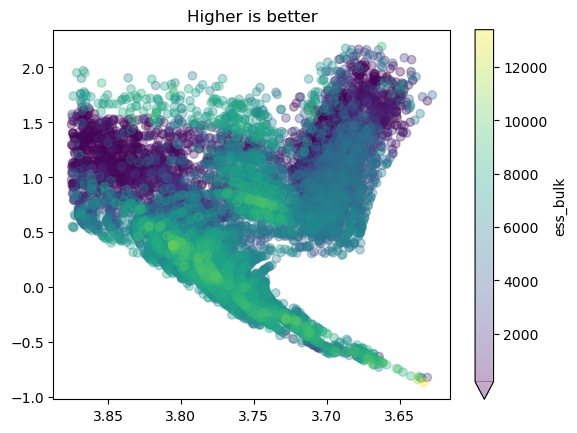

In [8]:
var_name = "log_evol"
metric = "ess_bulk"
cmap = "viridis"

fig, ax = plt.subplots()

c = summary[var_name].sel(metric=metric).values
sorted_stars = np.argsort(c)
s = ax.scatter(truths["log_Teff"][sorted_stars], truths["log_L"][sorted_stars], c=c[sorted_stars], alpha=0.33, vmin=200, cmap=cmap)

ax.invert_xaxis()
ax.set_title("Higher is better")

fig.colorbar(s, label=metric, extend="min");

/tmp/ipykernel_133062/1588990035.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin' will be ignored
  s = ax.scatter(median["log_Teff"], median["log_L"], alpha=0.33, vmin=200, cmap=cmap)


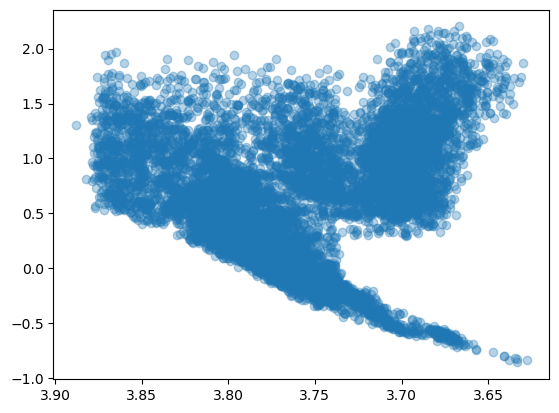

In [9]:
var_name = "log_evol"
metric = "ess_bulk"
cmap = "viridis"

fig, ax = plt.subplots()

median = summary.sel(metric="median")
s = ax.scatter(median["log_Teff"], median["log_L"], alpha=0.33, vmin=200, cmap=cmap)

ax.invert_xaxis()

In [10]:
z = (truths - summary.sel(metric="mean")) / summary.sel(metric="sd")
z

<xarray.Dataset>
Dimensions:    (star: 9998)
Coordinates:
  * star       (star) int32 0 1 2 3 4 5 6 ... 9993 9994 9995 9996 9997 9998 9999
Data variables: (12/13)
    M_H        (star) float64 -0.25 -0.3705 -0.1949 ... 0.2183 -0.1241 -0.2501
    Y          (star) float64 0.03774 0.5188 -0.2025 ... -0.6579 -0.3898 -0.3082
    a_MLT      (star) float64 -1.054 0.1182 0.3853 ... -0.02172 -0.08287 0.1214
    evol       (star) float64 0.03041 0.8227 -0.3961 ... -0.3395 -0.1348 0.1746
    log_mass   (star) float64 -0.1508 -0.4704 0.2321 ... 0.7003 0.4942 -0.1394
    mass       (star) float64 -0.1658 -0.4836 0.2205 ... 0.6886 0.4789 -0.1697
    ...         ...
    log_Teff   (star) float64 0.4215 0.9393 0.182 ... -0.6555 0.5893 0.1784
    log_R      (star) float64 -0.2481 0.08236 0.2533 ... 0.2573 0.4556 -0.4174
    log_Dnu    (star) float64 0.1121 -0.9525 -0.5073 ... 0.2381 -0.907 0.5695
    log_L      (star) float64 0.2893 1.4 0.619 -1.331 ... -0.5777 1.533 -0.453
    log_g      (star) float64 0.09847 -0.7881 -0.1247 ... 0.4404 0.0991 0.4991
    log_numax  (star) float64 0.02533 -0.9878 -0.1803 ... 0.5943 -0.01666 0.4151

In [11]:
import seaborn as sns

In [12]:
dfz = z.to_dataframe()

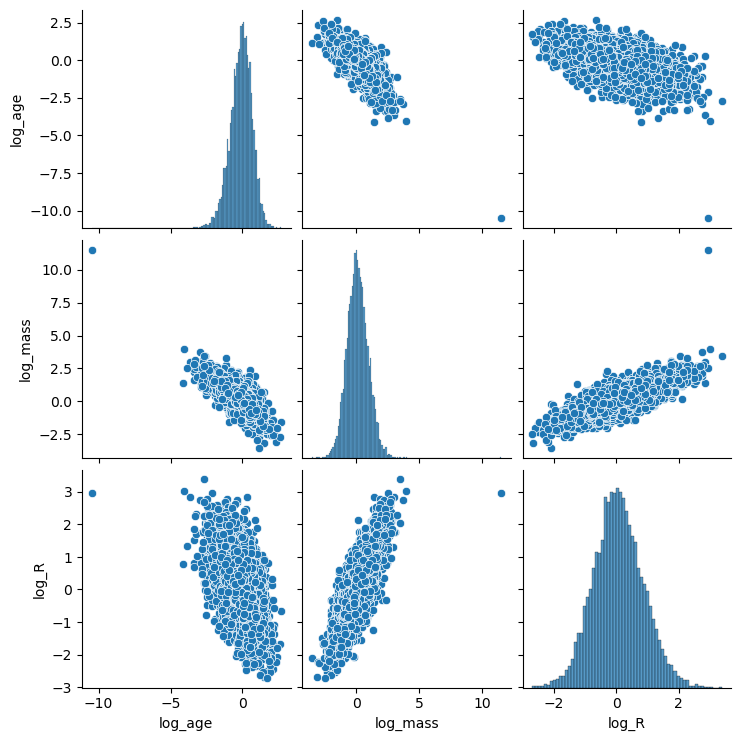

In [13]:
sns.pairplot(dfz, vars=["log_age", "log_mass", "log_R"])

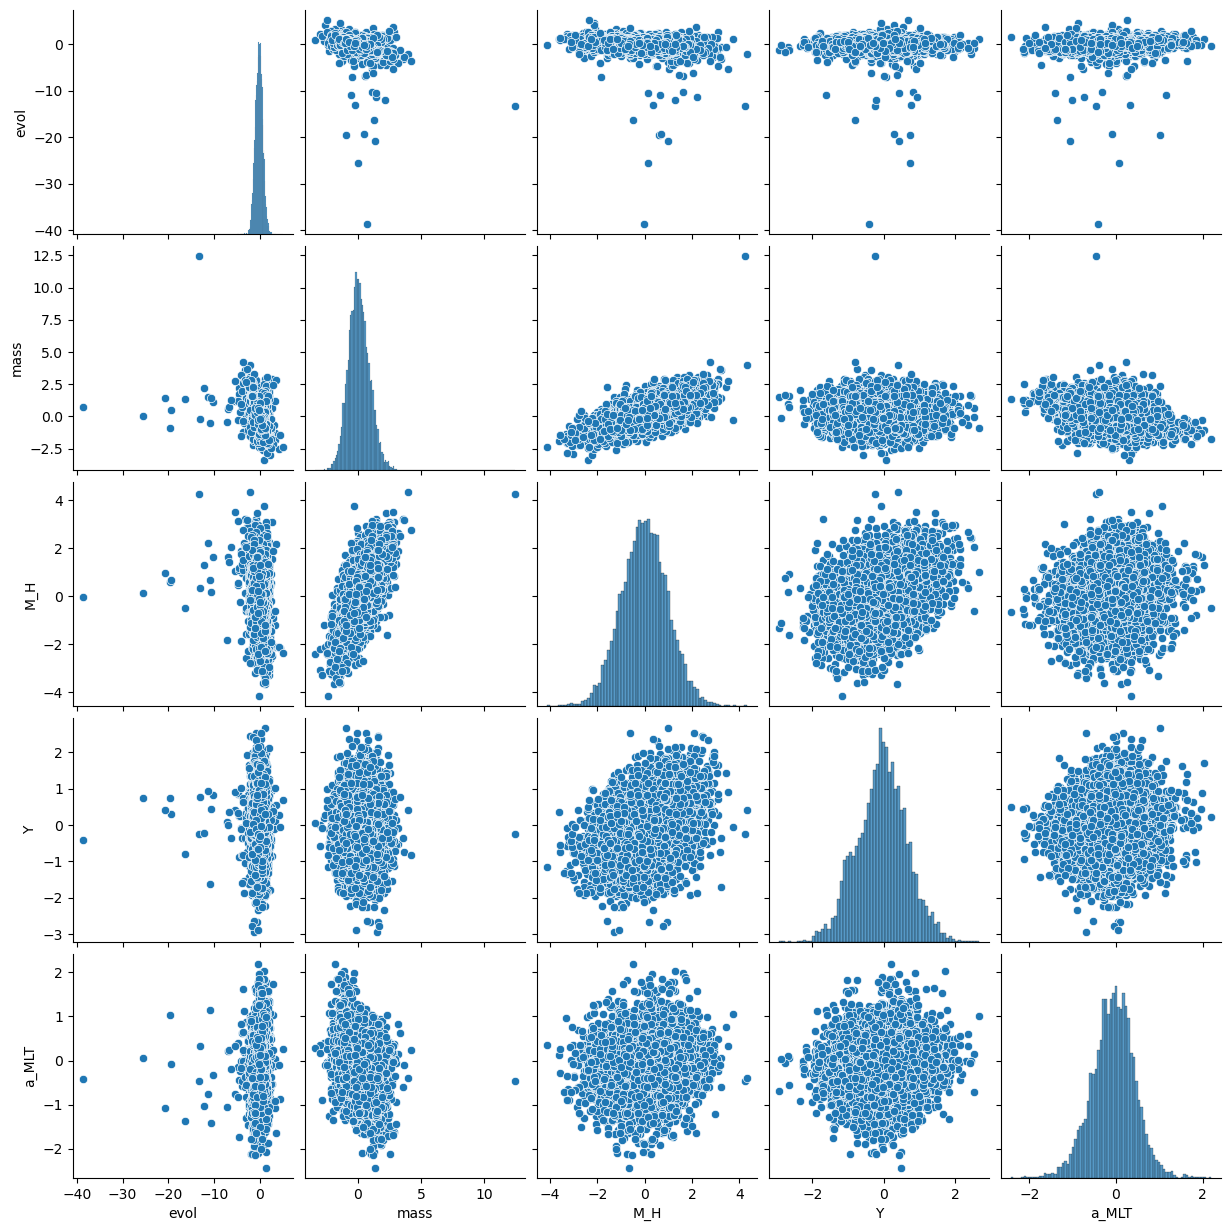

In [30]:
vars = ["evol", "mass", "M_H", "Y", "a_MLT"]
sns.pairplot(dfz, vars=vars)

In [17]:
rhat = summary.sel(metric="r_hat").to_dataframe()

In [24]:
dfmed = median.to_dataframe()
dfmed["r_hat"] = rhat.log_evol

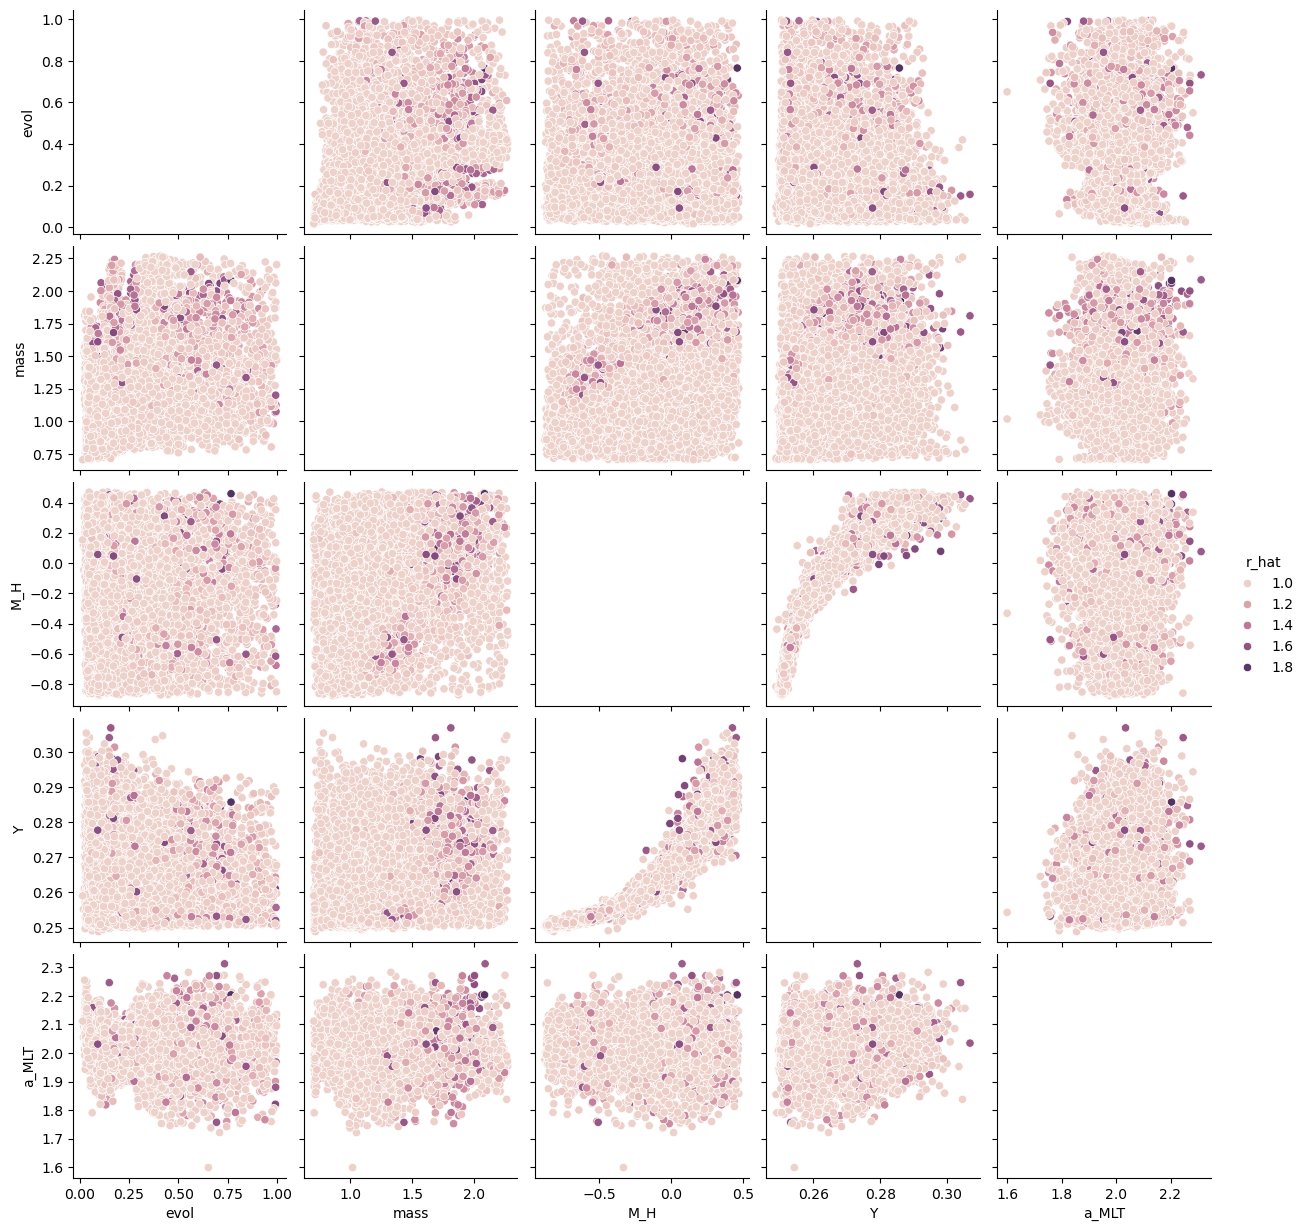

In [25]:
sns.pairplot(dfmed, vars=vars, hue="r_hat");

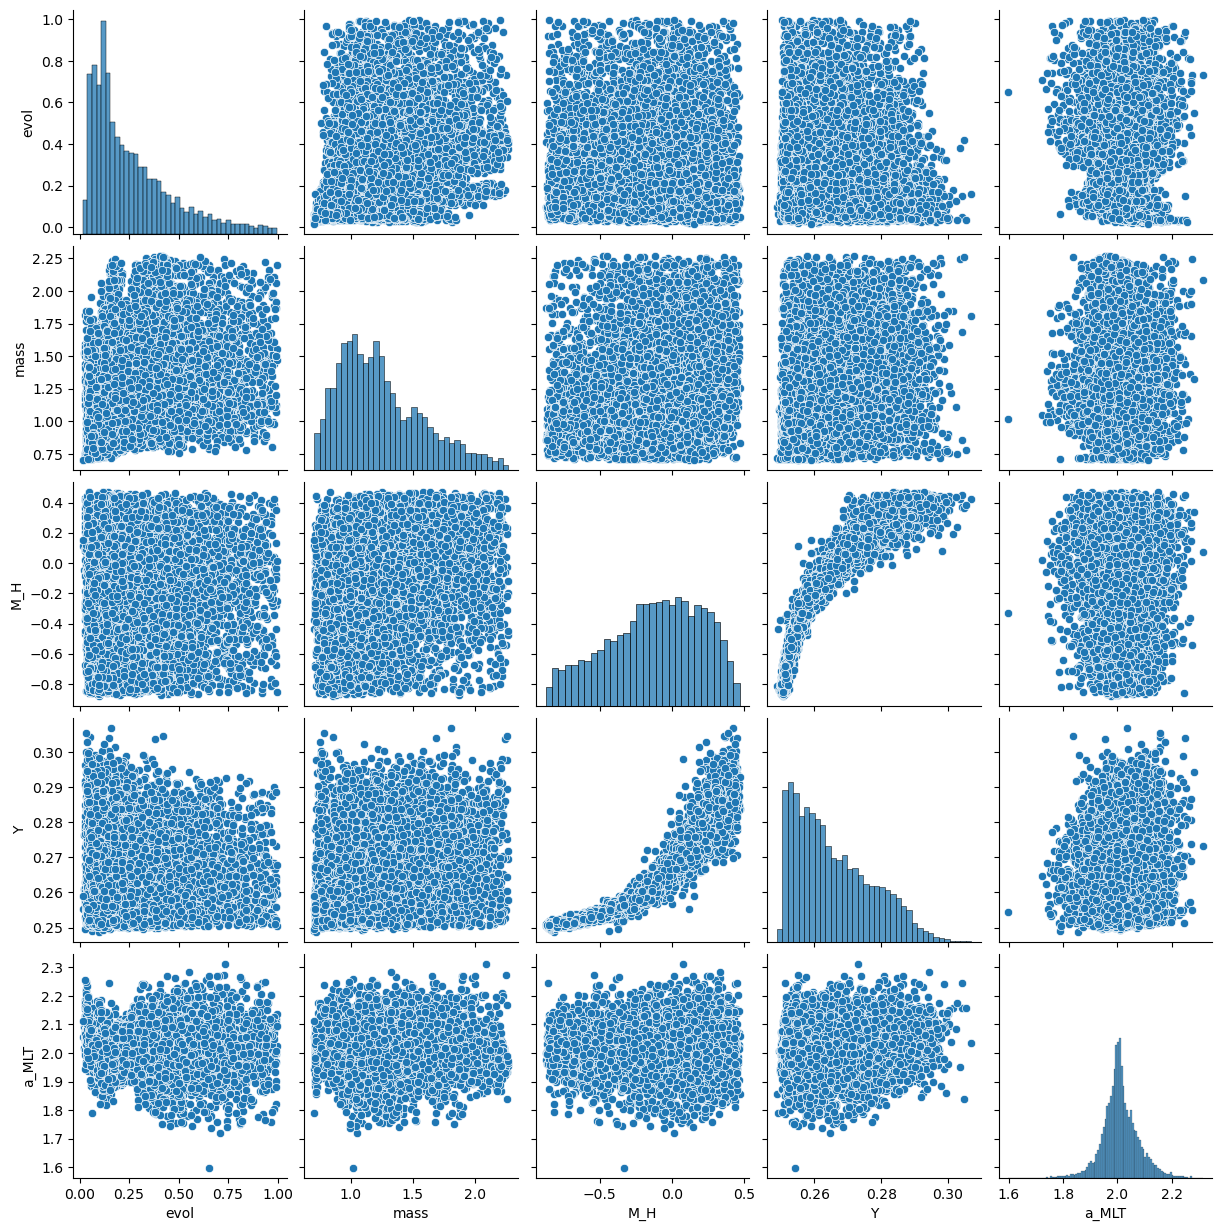

In [26]:
sns.pairplot(dfmed, vars=vars);